<a href="https://colab.research.google.com/github/Deepu-Pk/AI_Lab8/blob/main/Multivariate%20Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import io 
from google.colab import files
import matplotlib.pyplot as plt

uploaded = files.upload()
x_label = pd.read_csv(io.BytesIO(uploaded['2-D_x.csv']))
uploaded = files.upload()
y_label = pd.read_csv(io.BytesIO(uploaded['2-D_y.csv']))
feature =  [list(row) for row in x_label.values]
number_bed_rooms = []
size = []
for i in range(len(feature)):
    size.append(feature[i][0])
    number_bed_rooms.append(feature[i][1])
price = [list(row) for row in y_label.values]
x1 = size
x2 = number_bed_rooms
y = price
m = len(size) # m indicate that number of training examples

Saving 2-D_x.csv to 2-D_x (1).csv


Saving 2-D_y.csv to 2-D_y (1).csv


In [ ]:
#Feature normalization
mean_x1 = sum(x1)/m
mean_x2 = sum(x2)/m
var_x1 = max(x1) - min(x1)
var_x2 = max(x2) - min(x2)
for i in range(m):
    x1[i] = (x1[i] - mean_x1)/var_x1
    x2[i] = (x2[i] - mean_x2)/var_x2

In [ ]:
#Calculating cost function and Gradient descent 
diff = 0.0

y_pred = 0.0
theta0,theta1,theta2 = 0.0,0.0,0.0
theta0_gradient,theta1_gradient,theta2_gradient = 0.0,0.0,0.0
n = 2*m
M = [] # List containing cost function
J = []
iteration = []
epochs = 50
def gradient_descent(learning_rate,epochs):
    global y_pred,diff,theta0,theta1,theta2,theta0_gradient,theta1_gradient,theta2_gradient
    global n,M
    diff = 0.0
    y_pred = 0.0
    theta0,theta1,theta2 = 0.0,0.0,0.0
    theta0_gradient,theta1_gradient,theta2_gradient = 0.0,0.0,0.0
    M.clear() # List containing cost function
    for i in range(epochs):
        for j in range(m):
            y_pred = (theta2*x1[j])+(theta1*x2[j])+theta0
            diff = diff + ((y_pred - y[j])*(y_pred - y[j]))
            theta0_gradient = theta0_gradient + (y_pred - y[j])
            theta1_gradient = theta1_gradient + ((y_pred - y[j])*x1[j])
            theta2_gradient = theta2_gradient + ((y_pred - y[j])*x2[j])
        value = diff/n
        M.append(value)
        theta0 = theta0 - (learning_rate*theta0_gradient)
        theta1 = theta1 - (learning_rate*theta1_gradient)
        theta2 = theta2 - (learning_rate*theta2_gradient)
        theta0_gradient = 0.0
        theta1_gradient = 0.0
        theta2_gradient = 0.0
        diff = 0.0 

In [ ]:
#Cost function list
def cost_function():
    global M,J,iteration
    iteration.clear()
    J.clear()
    for i in range(50):
        J.append(M[i][0])
        iteration.append(i+1)
    return J,iteration

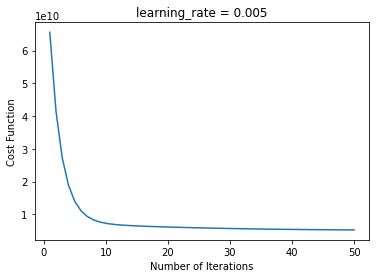

In [29]:
#Ploting cost function if  learning_rate = 0.005
learning_rate3 = 0.005
gradient_descent(learning_rate3,epochs)
J,iteration = cost_function()
x_1 = np.array(iteration)
y_1 = np.array(J)
plt.title("learning_rate = 0.005")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost Function")
plt.plot(x_1, y_1)
plt.show()

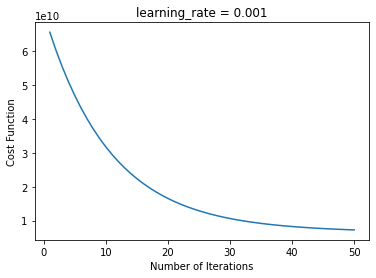

In [31]:
#Ploting cost function if  learning_rate = 0.001
learning_rate3 = 0.001
gradient_descent(learning_rate3,epochs)
J,iteration = cost_function()
x_1 = np.array(iteration)
y_1 = np.array(J)
plt.title("learning_rate = 0.001")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost Function")
plt.plot(x_1, y_1)
plt.show()

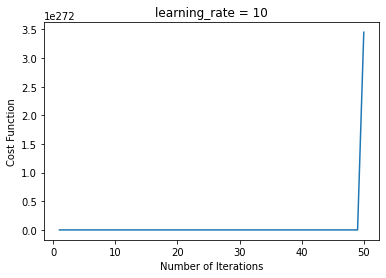

In [32]:
#Ploting cost function if  learning_rate = 10
learning_rate3 = 10
gradient_descent(learning_rate3,epochs)
J,iteration = cost_function()
x_1 = np.array(iteration)
y_1 = np.array(J)
plt.title("learning_rate = 10")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost Function")
plt.plot(x_1, y_1)
plt.show()

In [35]:
#Best learning rate,Parameters and predictions
print("We found that best lwaening rate is 0.001")
learning_rate4 = 0.001
gradient_descent(learning_rate4,epochs)
print("Parameter theta : ")
print("     Theta0 = ",theta0)
print("     Theta1 = ",theta1)
print("     Theta2 = ",theta2)
size_house = float(input("Enter the size of house in square feet = "))
bed_room = float(input("Enter the number of bed rooms = "))
price = (theta2*size_house)+(theta1*bed_room)+theta0
print("Predicted price of house = ",price)

We found that best lwaening rate is 0.001
Parameter theta : 
     Theta0 =  [309747.11125415]
     Theta1 =  [51304.85051838]
     Theta2 =  [21479.62959923]
Enter the size of house in square feet = 1650
Enter the number of bed rooms = 3
Predicted price of house =  [35905050.50154626]
